# Entendendo os dados sobre os salários daqueles que trabalham na área de dados:

Algumas observações:

*   ( ) parênteses = usa para chamar de função, operações matemáticas
*   { } chaves = criação de uma lista/dicionário

# **AULA 1 - Explorando dados com a biblioteca pandas**

> Adicionar aspas



In [65]:
# Importando as bibliotecas
import pandas as pd   # análise de dados

In [66]:
# Importando a base de dados de um repositório do Github
# daremos o nome de df (dataframe), mas pode ser o nome que desejar

# lendo os dados com a biblioteca pandas
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

# dados vem do Kaggle

In [67]:
# Primeira visualização para entender o que tem nessa base de dados
df.head()  # mostra apenas as 5 primeiras linhas
df.head(10)  # mostra as 10 primeiras linhas

# df trata dos salários que pessoas que trabalham na área de dados

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [68]:
# Analisando as informações do df
df.info()

# float: numérico com casas decimais
# object:
# int64: numérico sem casas decimais
# não tem dados nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [69]:
# Entendo melhor a base de dados - ESTATÍSTICA DESCRITIVA
# usando só os dados numéricos (float ou int)
df.describe()


# count: contagem, quantos registros tem para a coluna
# mean: média
# std: desvio padrão
# min: mínimo que recebeu naquele ano
# max: máximo que recebeu naquele ano

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [70]:
# Qual o tamanho da base
df.shape

# são 133.349 linhas e 11 colunas

(133349, 11)

In [71]:
# Deixando a quantidade de linhas e colunas com uma visualização melhor
# criando as variáveis "linhas", que guarda a quantidade de linhas, e "colunas" que guarda a quantidade de colunas
linhas, colunas = df.shape[0], df.shape[1]

# a quantidade de linhas começa no zero (0), posição 1 que pega a quantidade de colunas

In [72]:
# para ver as linhas e colunas
print("Número de colunas:", colunas)
print("Numero de linhas:", linhas)       # em aspas são o texto que quer ser impresso, nome para aparecer no relatório

Número de colunas: 11
Numero de linhas: 133349


In [73]:
# Quais os nomes das colunas?
df.columns

# elas estão em inglês

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [74]:
# Traduzindo os nomes das colunas para português
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns = renomear_colunas, inplace = True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'localizacao_empresa', 'tamanho_empresa'],
      dtype='object')

## **Analisando as variáveis (colunas)**


In [75]:
# Qual é a frequencia da variável "nível de experiência", em cada categoria
df["senioridade"].value_counts()

# SE: senior, MI: intermédiario/medium, EN: junior, EX: executivo/liderança

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


A maior parte dos indivíduos tem um nível de experiência "senior".

In [76]:
# Qual é a frequencia da variável "contrato", em cada categoria
df["contrato"].value_counts()

# FT: fulltime; CT: contrato temporário; PT: part time, FL: freelance

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


A maior parte dos indivíduos tem um contrato de trabalho em tempo integral (fulltime).

In [77]:
# Qual é a frequencia da variável "remoto"
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


A maior parte dos indivíduos trabalha presencialmente.(maioria das vagas são presenciais)

In [78]:
# Qual é a frequencia da variável "tamanho da empresa"
df["tamanho_empresa"].value_counts()

# M: médio, L: grande, S: pequeno

,count
tamanho_empresa,
M,129561
L,3574
S,214


A maior parte das empresas é de médio porte.

### Além de renomear as colunas, fica mais intuitivo renomear as categorias para que quando for necessário fazer relatórios, gráficos e dashboards a visualização seja melhor.

In [79]:
# Traduzindo os nomes das categorias da variável "tempo de experiência"
substituir_senioridade = {
    "SE": 'Senior',
    "MI": 'Pleno',
    "EN": 'Junior',
    "EX": 'Executivo'
}

df["senioridade"] = df["senioridade"].replace(substituir_senioridade)
df["senioridade"].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [80]:
# Traduzindo os nomes das categorias da variável "contrato"
substituir_contrato = {
    "FT": 'Tempo integral',
    "PT": 'Tempo parcial',
    "FL": 'Freelance',
    "CT": 'Contrato temporário'
}

df["contrato"] = df["contrato"].replace(substituir_contrato)
df["contrato"].value_counts()

,count
contrato,
Tempo integral,132563
Contrato temporário,394
Tempo parcial,376
Freelance,16


In [81]:
# Traduzindo os nomes das categorias da variável "tamanho da empresa"
substituir_tamanho_empresa = {
    "S": 'Pequena',
    "L": 'Grande',
    "M": 'Média',
}

df["tamanho_empresa"] = df["tamanho_empresa"].replace(substituir_tamanho_empresa)
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [82]:
# Traduzindo os nomes das categorias da variável "remoto"
substituir_remoto = {       # como as categorias estão em número, não usar as aspas
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df["remoto"] = df["remoto"].replace(substituir_remoto)
df["remoto"].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [83]:
# Verificando as mudanças
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


Usando o "describe" para ver variáveis categóricas  e contínuas(antes usamos só para as contínuas)

In [84]:
# ESTATÍSTICA DESCRITIVA
df.describe(include = "object")

# count = contagem de números na colunas
# unique = categorias (por exemplo, moeda salário tem 26 moedas diferentes; remoto tem 3 categorias - presencial, remoto e híbrido)
# top: qual informação é mais frequente (nível de experiência mais comum: senior)
# freq: fequencia - quantas vezes esse valor "top" está se repetindo (senior aparece 77.241 vezes)

,senioridade,contrato,cargo,moeda,residencia,remoto,localizacao_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [85]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# **AULA 2 - Limpando e preparando os dados**

In [86]:
# verificando se há informações nulas ou ausentes, não prenchidas de algo
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


Onde não há dado nulo, é indicado como "False".
Se tiver dado nulo, indicará com "True".

Pela tabela acima (5 primeiras e 5 últimas linhas) não sabe se tem infos nulas em toda a base. É mais interessante fazer a soma para verificar os nulos.

In [87]:
# indentificando onde estão os valores faltantes
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao_empresa,0


Veja que aparece todas as variáveis que compõem o dataframe.
Para todas aparece o valor 0 (zero), indicando que a soma do que é nulo, é igual a zero, ou seja, não há valores faltantes.
Exceto para a variável ano, que o valor 10 indica que possui 10 registros que não tem a variável ano preenchido.

In [88]:
# Mas quais são os anos dentro dessa base de dados?
# usamos o "unique" para verificar os valores únicos

df["ano"].unique()

# nan = valor nulo - NOT A  NUMBER

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [89]:
# Quais são as linhas que possuem esse "NAN" para a variável ano?
df[df.isnull().any(axis = 1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,tamanho_empresa
5588,NaN,Senior,Tempo integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


O que fazer com os dados nulos?????

Existem 3 possibilidades:


1.   Inserir informações
2.   Excluir os dados (observações) que não possuem as informações
3.   Fazer a importação usando alguma regra

**Pensando na primeira opção: INSERIR INFORMAÇÕES**

Nesse caso, poderíamos inserir a **média** ou a **mediana** para não descalibrar a base de dados.

In [90]:
# importar o numpy que é uma biblioteca para manipulação de dados
import numpy as np


# Como não é viável fazer a média/mediana dos anos, vamos criar um dataframe apenas para ilustrar a primeira possibilidade
# vamos pensar em um caso que um df tenha valores de salários diferentes

# criando um df de teste
df_salarios = pd.DataFrame({
    "nome": ["Ana", "Bruno", "Carlos", "Daniele", "Val"],  # usa aspas pq não é uma variável numérica
    "salario": [4000, np.nan, 5000, np.nan, 100000]  # np.nan - usado para indicar o valor nulo
})


# Preenchendo os dados faltantes com a MÉDIA, calculando a média
df_salarios["salario_media"] = df_salarios["salario"].fillna(df_salarios["salario"].mean().round(2))
df_salarios

,nome,salario,salario_media
0,Ana,4000.0,4000.00
1,Bruno,NaN,36333.33
2,Carlos,5000.0,5000.00
3,Daniele,NaN,36333.33
4,Val,100000.0,100000.00


In [91]:
# Preenchendo os dados faltantes com a MEDIANA, calculando a média
df_salarios["salario_mediana"] = df_salarios["salario"].fillna(df_salarios["salario"].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


**Pensando na terceira opção: INSERIR INFORMAÇÕES usando uma regra**

Pensando em um exemplo de temperatura, que temos dados da temperatura máxima por dia.
Porém, em alguns dias temos "nan". O que poderia ser feito? Uma possibilidade seria repetir a temperatura máxima do dia anterior.

In [92]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

# criando uma nova coluna
df_temperaturas["preenchico_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

# ffill = forward fill - completar com o anterior

,Dia,Temperatura,preenchico_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [93]:
# E SE A SEGUNDA NÃO TIVESSE VALOR? podemos pensar em outra estratéga usando os dados do dia seguinte

# criando uma nova coluna
df_temperaturas["preenchico_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

# bfill = backward fill - completar com o seguinte

,Dia,Temperatura,preenchico_ffill,preenchico_bfill
0,Segunda,30.0,30.0,30.0
1,Terça,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


Pensando em outro exemplo...

Suponha um dataframe composto por algumas pessoas, mas algumas delas não disponibilizaram o local de moradia.

In [94]:
df_cidades = pd.DataFrame({
    "nome": ["Ana", "Bruno", "Carlos", "Daniele", "Val"],  # usa aspas pq não é uma variável numérica
    "cidade": ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
  })

df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


Considerando o exemplo das cidades, uma opção é deixar o "Não informado". Mas, caso a base de dados for muito grande, retirar algumas informações dela não traria prejuízo. Então vamos pensar na possibilidade de retirar as observações que possuem a cidade como "Não informado".

**Pensando na segunda opção: EXCLUIR OS DADOS**

In [95]:
# uma boa prática não é excluir do dataframe original. Vai que dá ruim né?

# vamos criar uma nova variável para armanezar
df_limpo = df.dropna()

# verificando se as informações com os nulos foram excluídas
df_limpo.isnull().sum()
# todos os valores estão zerados, não temos mais dados faltantes

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao_empresa,0


In [96]:
df_limpo.head()
# veja que a coluna ano tem casas decimais, isso não faz muito sentido

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [97]:
df_limpo.info()
# a variável ano é do tipo float64, que é o número com casas decimais

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano                  133339 non-null  float64
 1   senioridade          133339 non-null  object 
 2   contrato             133339 non-null  object 
 3   cargo                133339 non-null  object 
 4   salario              133339 non-null  int64  
 5   moeda                133339 non-null  object 
 6   usd                  133339 non-null  int64  
 7   residencia           133339 non-null  object 
 8   remoto               133339 non-null  object 
 9   localizacao_empresa  133339 non-null  object 
 10  tamanho_empresa      133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [98]:
# vamos converter o tipo da variável "ano" de float64 pq não tem casas deciais para int64
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype("int64"))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ano                  133339 non-null  int64 
 1   senioridade          133339 non-null  object
 2   contrato             133339 non-null  object
 3   cargo                133339 non-null  object
 4   salario              133339 non-null  int64 
 5   moeda                133339 non-null  object
 6   usd                  133339 non-null  int64 
 7   residencia           133339 non-null  object
 8   remoto               133339 non-null  object
 9   localizacao_empresa  133339 non-null  object
 10  tamanho_empresa      133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [99]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025,Senior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


# **AULA 3 - Criando gráficos**

In [100]:
# lembrando dos nossos dados
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025,Senior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição do nível de experiência'}, xlabel='senioridade'>

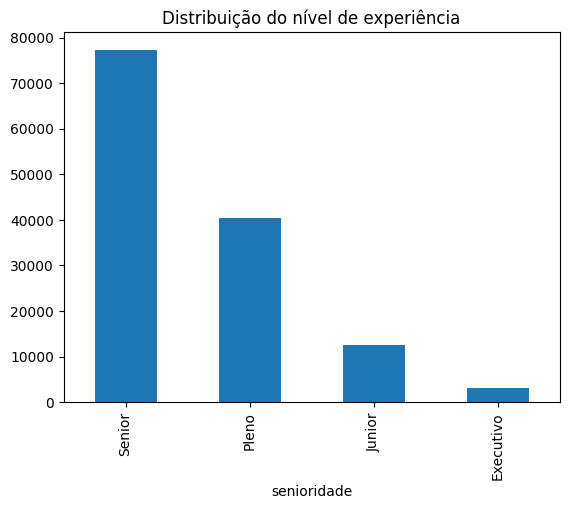

In [101]:
# a biblioteca pandas pode ser usada pra plotar gráficos, embora tenha limitações na questão da customização

# contagem das categorias da variável "experiência"
df_limpo['senioridade'].value_counts().plot(kind = 'bar', title = 'Distribuição do nível de experiência')

Eixo x: nível de experiência;
Eixo y: contagem de cada categoria

Vamos pensar em uma empresa com essas características.
Talvez, no futuro ela tenha problema pois tem mais que o dobro de "senior" do que "pleno", e com poucos "juniores".
Estou conseguindo treinar essas pessoas?

# Para customizar os gráficos temos duas grandes bibliotecas para usar:

1.   Matplotlib
2.   Seaborn

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='senioridade', ylabel='usd'>

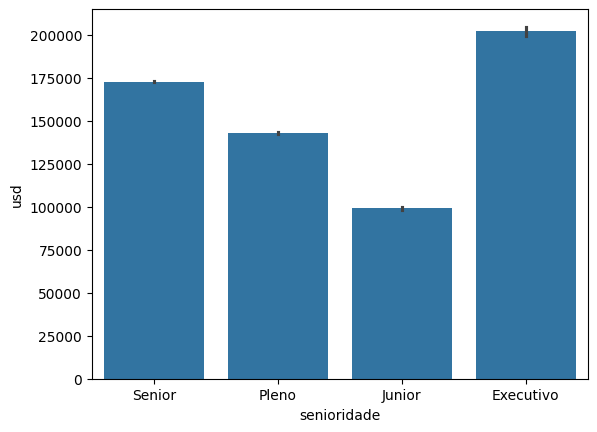

In [104]:
# Gráfico de barras
sns.barplot(data = df_limpo, x = "senioridade", y = "usd")

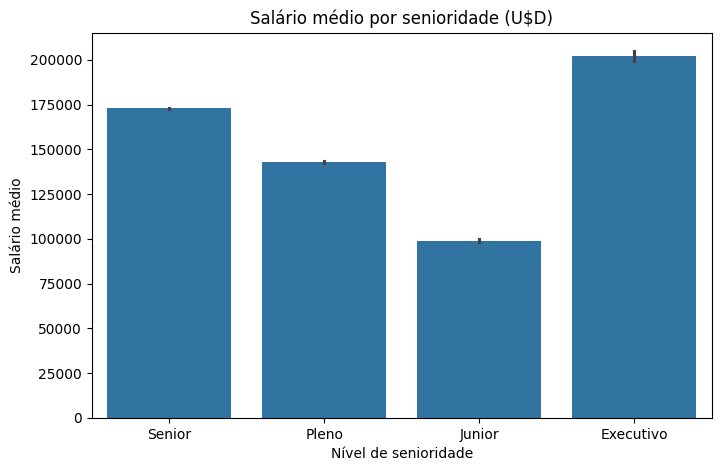

In [105]:
# Customizando o gráfico de barras acima

# tamanho da figura
plt.figure(figsize = (8, 5))    # largura e altura

# gráfico de barras
sns.barplot(data = df_limpo, x = "senioridade", y = "usd")

# inserindo o título
plt.title("Salário médio por senioridade (U$D)")

# inserindo o nome do eixo x
plt.xlabel("Nível de senioridade")

# inserindo o nome do eixo y
plt.ylabel("Salário médio")

plt.show()    # mostra apenas o gráfico, sem textos em cima

In [106]:
# ordenando as barras de forma decrescente
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending = False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [107]:
# armazenando dentro de uma variável para passar como parâmetro para o seaborn fazer a ordenação

# Ordem descrescente
ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending = False).index
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

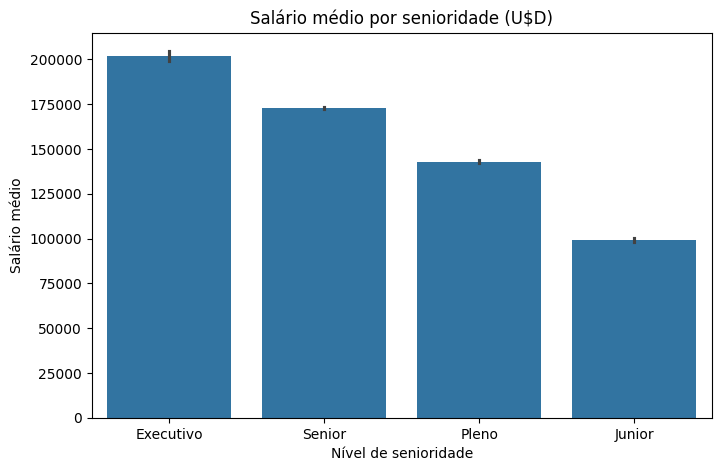

In [108]:
# Customizando o gráfico de barras em ORDEM DESCRESCENTE

# tamanho da figura
plt.figure(figsize = (8, 5))    # largura e altura

# gráfico de barras
sns.barplot(data = df_limpo, x = "senioridade", y = "usd", order = ordem)

# inserindo o título
plt.title("Salário médio por senioridade (U$D)")

# inserindo o nome do eixo x
plt.xlabel("Nível de senioridade")

# inserindo o nome do eixo y
plt.ylabel("Salário médio")

plt.show()    # mostra apenas o gráfico, sem textos em cima

In [109]:
# E se quiser em ordem crescente?
ordem2 = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending = True).index
ordem2

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

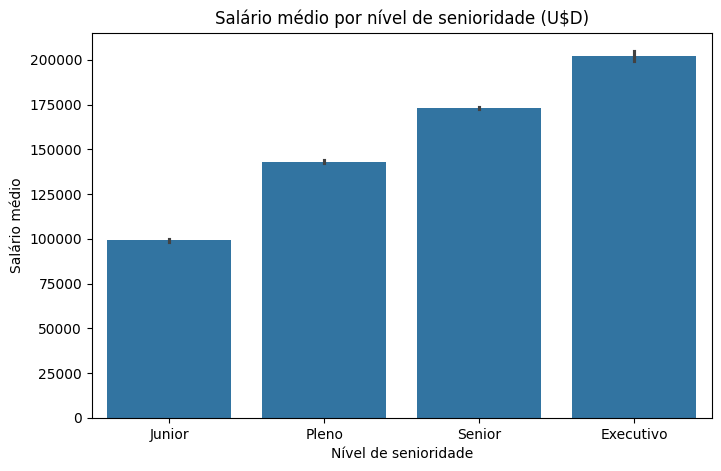

In [110]:
# Customizando o gráfico de barras em ORDEM CRESCENTE

# tamanho da figura
plt.figure(figsize = (8, 5))    # largura e altura

# gráfico de barras
sns.barplot(data = df_limpo, x = "senioridade", y = "usd", order = ordem2)

# inserindo o título
plt.title("Salário médio por nível de senioridade (U$D)")

# inserindo o nome do eixo x
plt.xlabel("Nível de senioridade")

# inserindo o nome do eixo y
plt.ylabel("Salário médio")

plt.show()    # mostra apenas o gráfico, sem textos em cima

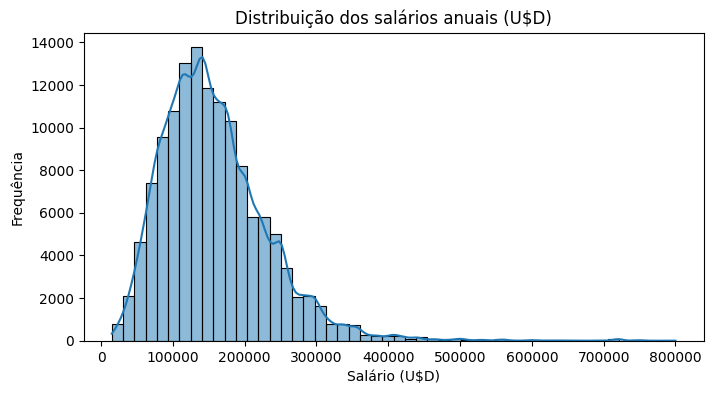

In [111]:
# Como está a distribuição salarial? Será que está mais concentrado ou distribuido?

# tamanho da figura
plt.figure(figsize = (8, 4))    # largura e altura

# histrograma
sns.histplot(df_limpo["usd"], bins = 50, kde = True)  # bins intervalos entre as barras do histograma / quantidade de barras
                                                              # kde - linha azul

# inserindo o título
plt.title("Distribuição dos salários anuais (U$D)")

# inserindo o nome do eixo x
plt.xlabel("Salário (U$D)")

# inserindo o nome do eixo y
plt.ylabel("Frequência")

plt.show()    # mostra apenas o gráfico, sem textos em cima

A distribuição está mais voltada a esquerda (não é normal). (calda longa)
A maioria dos salários está mais concentradanos nos valores mais baixos.
Maior parte dos salários está entre 150.000, poucas pessoas entre 700.000 e 800.000.

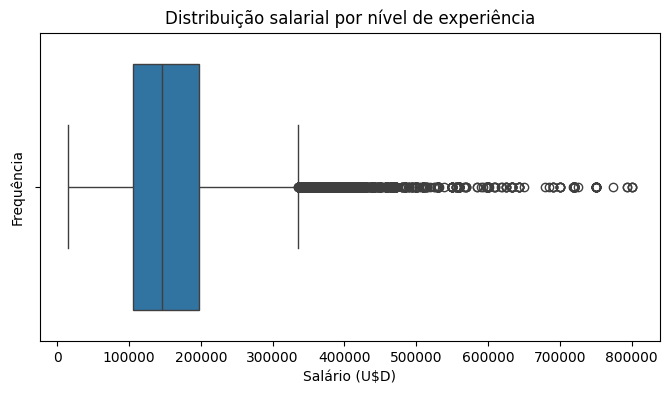

In [112]:
# Como está a distribuição salarial? OLHANDO PELO BOXPLOT

# tamanho da figura
plt.figure(figsize = (8, 4))    # largura e altura

# boxplot
sns.boxplot(x = df_limpo["usd"])

# inserindo o título
plt.title("Distribuição salarial por nível de experiência")

# inserindo o nome do eixo x
plt.xlabel("Salário (U$D)")

# inserindo o nome do eixo y
plt.ylabel("Frequência")


plt.show()    # mostra apenas o gráfico, sem textos em cima

Mostra a distribuição do salário por meio de uma caixa, evidenciando de um ponto a outro, o valor mínimo ao valor máximo.
A linha no meio da caixa é a mediana, o quartil de 25% e o quartil de 75%.
Acima da extremidade direita vemos diversos pontos que representam os outliers. Ou seja, são dados discrepantes dos que vemos da caixa, complementando o que vimos no histograma.

Tendo o cenário de uma empresa, qual salário deveria ter para atrair os melhores talentos pra sua empresa? Abaixo de 150.000 provavelmente está da mediana para baixo, talvez não seja interessante. Mas... para atrair os melhores poderá fazer uma estratégia que atraia esse talento, mas não saindo muito do padrão.

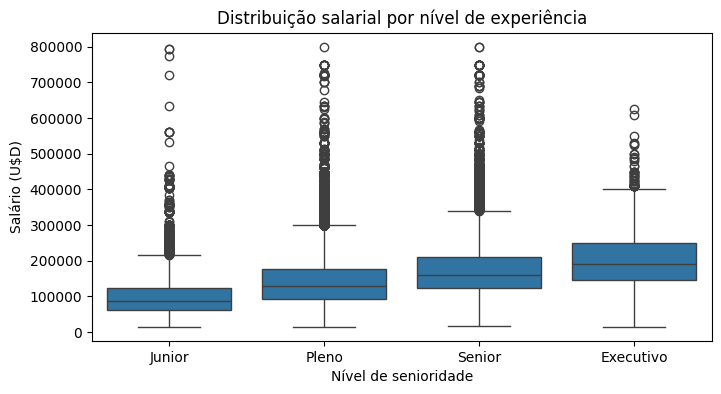

In [113]:
# criando uma variável para identificar a ordem
ordem_experiencia = ["Junior", "Pleno", "Senior", "Executivo"]

# tamanho da figura
plt.figure(figsize = (8, 4))    # largura e altura

# boxplot
sns.boxplot(x = "senioridade", y = "usd", data = df_limpo, order = ordem_experiencia)

# inserindo o título
plt.title("Distribuição salarial por nível de experiência")

# inserindo o nome do eixo x
plt.xlabel("Nível de senioridade")

# inserindo o nome do eixo y
plt.ylabel("Salário (U$D)")


plt.show()    # mostra apenas o gráfico, sem textos em cima

Note como as medidas se diferem quando considerando o nível de experiência/senioridade.
Existem alguns outliers seniors que ganham mais que executivos.

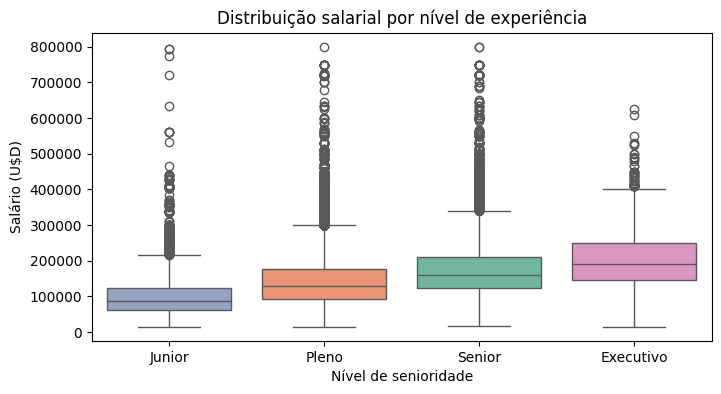

In [114]:
# MUDANDO AS CORES

# criando uma variável para identificar a ordem
ordem_experiencia = ["Junior", "Pleno", "Senior", "Executivo"]

# tamanho da figura
plt.figure(figsize = (8, 4))    # largura e altura

# boxplot
sns.boxplot(x = "senioridade", y = "usd", data = df_limpo, order = ordem_experiencia, palette = "Set2", hue = "senioridade")

# inserindo o título
plt.title("Distribuição salarial por nível de experiência")

# inserindo o nome do eixo x
plt.xlabel("Nível de senioridade")

# inserindo o nome do eixo y
plt.ylabel("Salário (U$D)")


plt.show()    # mostra apenas o gráfico, sem textos em cima

# **Partindo para os gráficos interativos ...**

Para isso usamos a biblioteca "plotly".

In [115]:
import plotly.express as px

In [116]:
# Gráfico de barras por média salarial por nível de experiência

experiencia_media_salario = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending = False).reset_index()

fig = px.bar(experiencia_media_salario,
             x = "senioridade",
             y = "usd",
             title = "Média salarial por nível de experiência",
             labels = {"senioridade": "Nível de experiência", "usd": "Média salarial U$D"},
             color = "senioridade")
fig.show()

In [117]:
# Gráfico de PIZZA usando a variável de trabalho remoto

remoto_contagem = df_limpo["remoto"].value_counts().reset_index()

# Defifindo as colunas
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
            names = "tipo_trabalho",
            values = "quantidade",
            title = "Proporção dos tipos de trabalho")
fig.show()

In [118]:
# TRANSFORMANDO O GRÁFICO DE PIZZA EM ROSCA

remoto_contagem = df_limpo["remoto"].value_counts().reset_index()

# Defifindo as colunas
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
            names = "tipo_trabalho",
            values = "quantidade",
            title = "Proporção dos tipos de trabalho",
            hole = 0.5)
fig.update_traces(textinfo = "percent+label")

fig.show()

In [119]:
# Filtrando o DataFrame para incluir apenas "Data Scientist"
df_ds = df_limpo[df_limpo["cargo"] == "Data Scientist"]

# Calculando o salário médio por país para Cientistas de Dados
salario_medio_pais_ds = df_ds.groupby("localizacao_empresa")["usd"].mean().reset_index()

# Ordenando os países pelo salário médio de forma decrescente
salario_medio_pais_ds = salario_medio_pais_ds.sort_values(by = "usd", ascending = False)

# Criando o gráfico de barras interativo com Plotly Express
fig = px.bar(salario_medio_pais_ds,
             x = "localizacao_empresa",
             y = "usd",
             title = "Salário médio para Cientistas de Dados por País (U$D)",
             labels = {"localizacao_empresa": "País", "usd": "Salário médio (U$D)"})

fig.show()

# **Aula 4 - Construindo um Dashboard Interativo com Streamlit**

Aprender a usar a biblioteca Streamlit para a criação de um dashboard interativo simples, que permite visualizar dados filtrados e gerar gráficos de forma prática.

A partir desse ponto, os códigos abaixo serão usados no VSCode.

https://dashboard-salarios-dados.streamlit.app/

Passo (1): Criar o ambiente virtual:

In [58]:
python3 -m venv .venv

SyntaxError: invalid syntax (ipython-input-2259807695.py, line 1)

Passo (2) Ativar o ambiente virtual em Windows:

In [ ]:
.venv\Scripts\Activate

Passo (3) Criar um arquivo chamado requirements.txt e adicionar os pacotes necessários:

In [ ]:
pandas==2.2.3
streamlit==1.44.1
plotly==5.24.1

# file - new text file - salvar como "requirements.txt"

Passo (4) Instalar as bibliotecas necessárias:

In [ ]:
pip install -r requirements.txt

# veja que é nome do arquivo que criamos no passo anterior

Em seguida clique em: file - new file - salve com o nome de "app.py"

Importando as bibliotecas...

In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px

In [ ]:
# --- Configuração da Página ---
# Define o título da página, o ícone e o layout para ocupar a largura inteira.
st.set_page_config(
    page_title="Dashboard de Salários na Área de Dados",
    page_icon="📊",
    layout="wide",
)

In [ ]:
# --- Carregamento dos dados ---
# df_limpo foi salvo no github
df = pd.read_csv("https://raw.githubusercontent.com/vqrca/dashboard_salarios_dados/refs/heads/main/dados-imersao-final.csv")

In [ ]:
# --- Barra Lateral (Filtros) ---
st.sidebar.header("🔍 Filtros")

In [ ]:
# Filtro de Ano
anos_disponiveis = sorted(df['ano'].unique())
anos_selecionados = st.sidebar.multiselect("Ano", anos_disponiveis, default=anos_disponiveis)

# Filtro de Senioridade
senioridades_disponiveis = sorted(df['senioridade'].unique())
senioridades_selecionadas = st.sidebar.multiselect("Senioridade", senioridades_disponiveis, default=senioridades_disponiveis)

# Filtro por Tipo de Contrato
contratos_disponiveis = sorted(df['contrato'].unique())
contratos_selecionados = st.sidebar.multiselect("Tipo de Contrato", contratos_disponiveis, default=contratos_disponiveis)

# Filtro por Tamanho da Empresa
tamanhos_disponiveis = sorted(df['tamanho_empresa'].unique())
tamanhos_selecionados = st.sidebar.multiselect("Tamanho da Empresa", tamanhos_disponiveis, default=tamanhos_disponiveis)

# --- Filtragem do DataFrame ---
# O dataframe principal é filtrado com base nas seleções feitas na barra lateral.
df_filtrado = df[
    (df['ano'].isin(anos_selecionados)) &
    (df['senioridade'].isin(senioridades_selecionadas)) &
    (df['contrato'].isin(contratos_selecionados)) &
    (df['tamanho_empresa'].isin(tamanhos_selecionados))
]

In [ ]:
# --- Conteúdo Principal ---
st.title("🎲 Dashboard de Análise de Salários na Área de Dados")
st.markdown("Explore os dados salariais na área de dados nos últimos anos. Utilize os filtros à esquerda para refinar sua análise.")

In [ ]:
# --- Métricas Principais (KPIs) ---
st.subheader("Métricas gerais (Salário anual em USD)")

if not df_filtrado.empty:
    salario_medio = df_filtrado['usd'].mean()
    salario_maximo = df_filtrado['usd'].max()
    total_registros = df_filtrado.shape[0]
    cargo_mais_frequente = df_filtrado["cargo"].mode()[0]
else:
    salario_medio, salario_mediano, salario_maximo, total_registros, cargo_mais_comum = 0, 0, 0, ""

col1, col2, col3, col4 = st.columns(4)
col1.metric("Salário médio", f"${salario_medio:,.0f}")
col2.metric("Salário máximo", f"${salario_maximo:,.0f}")
col3.metric("Total de registros", f"{total_registros:,}")
col4.metric("Cargo mais frequente", cargo_mais_frequente)

st.markdown("---")

In [ ]:
# --- Análises Visuais com Plotly ---
st.subheader("Gráficos")

col_graf1, col_graf2 = st.columns(2)

with col_graf1:
    if not df_filtrado.empty:
        top_cargos = df_filtrado.groupby('cargo')['usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()
        grafico_cargos = px.bar(
            top_cargos,
            x='usd',
            y='cargo',
            orientation='h',
            title="Top 10 cargos por salário médio",
            labels={'usd': 'Média salarial anual (USD)', 'cargo': ''}
        )
        grafico_cargos.update_layout(title_x=0.1, yaxis={'categoryorder':'total ascending'})
        st.plotly_chart(grafico_cargos, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de cargos.")

with col_graf2:
    if not df_filtrado.empty:
        grafico_hist = px.histogram(
            df_filtrado,
            x='usd',
            nbins=30,
            title="Distribuição de salários anuais",
            labels={'usd': 'Faixa salarial (USD)', 'count': ''}
        )
        grafico_hist.update_layout(title_x=0.1)
        st.plotly_chart(grafico_hist, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de distribuição.")

col_graf3, col_graf4 = st.columns(2)

with col_graf3:
    if not df_filtrado.empty:
        remoto_contagem = df_filtrado['remoto'].value_counts().reset_index()
        remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
        grafico_remoto = px.pie(
            remoto_contagem,
            names='tipo_trabalho',
            values='quantidade',
            title='Proporção dos tipos de trabalho',
            hole=0.5
        )
        grafico_remoto.update_traces(textinfo='percent+label')
        grafico_remoto.update_layout(title_x=0.1)
        st.plotly_chart(grafico_remoto, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico dos tipos de trabalho.")

with col_graf4:
    if not df_filtrado.empty:
        df_ds = df_filtrado[df_filtrado['cargo'] == 'Data Scientist']
        media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()
        grafico_paises = px.choropleth(media_ds_pais,
            locations='residencia_iso3',
            color='usd',
            color_continuous_scale='rdylgn',
            title='Salário médio de Cientista de Dados por país',
            labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})
        grafico_paises.update_layout(title_x=0.1)
        st.plotly_chart(grafico_paises, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de países.")


In [ ]:
# --- Tabela de Dados Detalhados ---
st.subheader("Dados Detalhados")
st.dataframe(df_filtrado)

In [126]:
# PARA O MAPA....
# estava com 2 letras e precisa de 3 letras

# US vira USA
# AI vira AUS
# e assim por diante

!pip install pycountry

In [127]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == "Data Scientist"]
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})
fig.show()

In [128]:
df_limpo.head()

# US vira USA
# AI vira AUS
# e assim por diante

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao_empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Senior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Junior,Tempo integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


# **Depois da base de dados pronta, como a disponibilizar no github?**

In [129]:
df_limpo.to_csv("dados-imersao-final.csv", index = False)

# em seguida só clicar no ícone da pasta no lado esquerdo